In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("Vistara.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231490 entries, 0 to 231489
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_of_journey    231490 non-null  object 
 1   Journey_day        231490 non-null  object 
 2   Flight_code        231490 non-null  object 
 3   Class              231490 non-null  object 
 4   Source             231490 non-null  object 
 5   Departure          231490 non-null  object 
 6   Total_stops        231490 non-null  object 
 7   Arrival            231490 non-null  object 
 8   Destination        231490 non-null  object 
 9   Duration_in_hours  231490 non-null  float64
 10  Days_left          231490 non-null  int64  
 11  Fare               231490 non-null  int64  
dtypes: float64(1), int64(2), object(9)
memory usage: 21.2+ MB


In [4]:
data.describe()

,Duration_in_hours,Days_left,Fare
count,231490.000000,231490.000000,231490.000000
mean,13.832560,25.632006,27240.788820
std,7.372811,14.274387,21908.486922
min,0.833300,1.000000,2019.000000
25%,8.416700,13.000000,11482.000000
50%,12.666700,26.000000,16394.000000
75%,18.583300,38.000000,42514.000000
max,43.583300,50.000000,143019.000000


C:\Users\91938\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration_in_hours'>

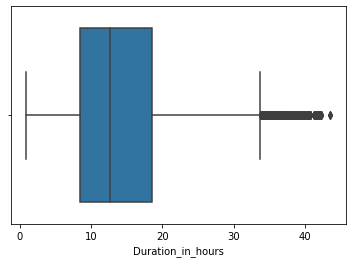

In [5]:
sns.boxplot(data["Duration_in_hours"])

In [6]:
Q1=data["Duration_in_hours"].quantile(0.25)
Q3=data["Duration_in_hours"].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
data= data[data["Duration_in_hours"]< Upper_Whisker]

C:\Users\91938\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Duration_in_hours'>

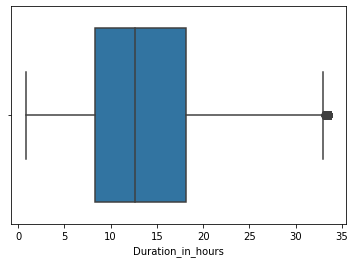

In [7]:
sns.boxplot(data["Duration_in_hours"])

In [8]:
data.isnull().sum()

Date_of_journey      0
Journey_day          0
Flight_code          0
Class                0
Source               0
Departure            0
Total_stops          0
Arrival              0
Destination          0
Duration_in_hours    0
Days_left            0
Fare                 0
dtype: int64

### Univariate Analysis

In [9]:
plt.style.use("fivethirtyeight")

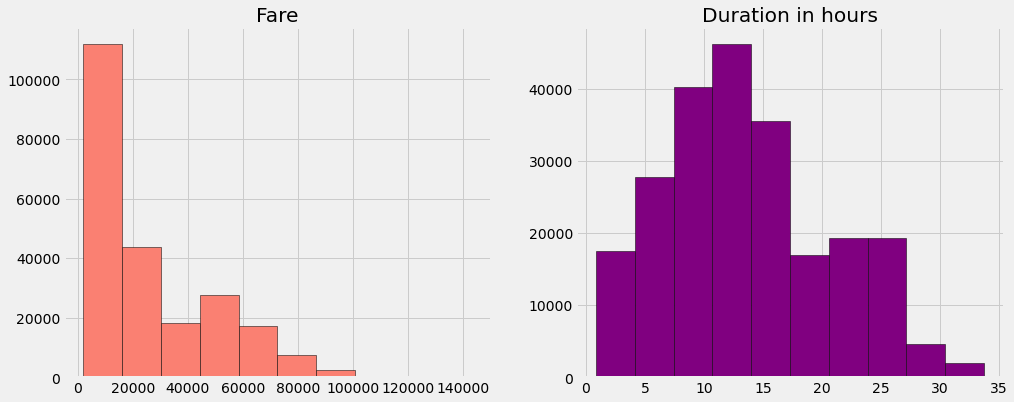

In [10]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(data["Fare"],edgecolor="black",color="salmon")
plt.title("Fare")

plt.subplot(1,2,2)
plt.hist(data["Duration_in_hours"],edgecolor="black",color="purple")
plt.title("Duration in hours")

plt.show()

In [11]:
data["Journey_day"].value_counts()

Monday       36759
Friday       32552
Thursday     32547
Wednesday    32191
Saturday     32120
Tuesday      31930
Sunday       31278
Name: Journey_day, dtype: int64

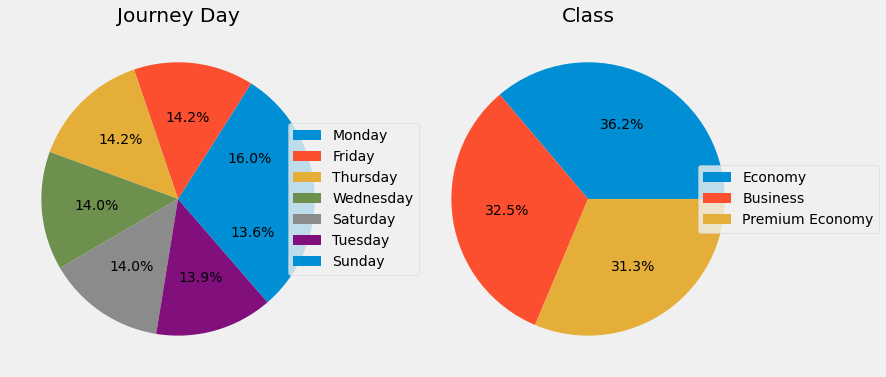

In [12]:
journey_day_counts = data['Journey_day'].value_counts()
class_counts = data['Class'].value_counts()

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.pie(journey_day_counts, autopct="%0.1f%%")
plt.title('Journey Day')
plt.legend(journey_day_counts.index, loc="center left",bbox_to_anchor =(0.8, 0.5))

plt.subplot(1,2,2)

plt.pie(class_counts, autopct="%0.1f%%")
plt.title('Class')
plt.legend(class_counts.index, loc="center left",bbox_to_anchor=(0.8, 0.5))

plt.show()

## Bivariate Analysis

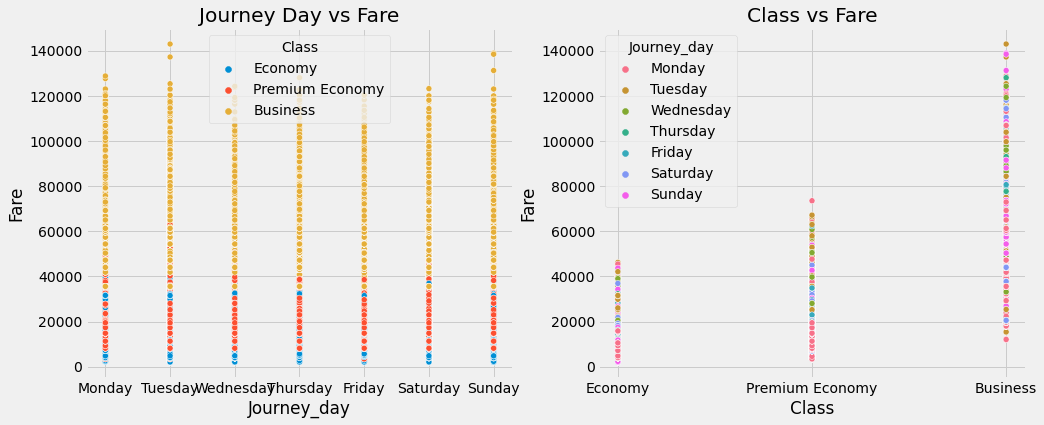

In [13]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x="Journey_day",y="Fare",data=data,hue='Class')
plt.title("Journey Day vs Fare")

plt.subplot(1,2,2)
sns.scatterplot(x="Class",y="Fare",data=data,hue="Journey_day")
plt.title("Class vs Fare")

plt.show()

### **Multivariate Analysis**

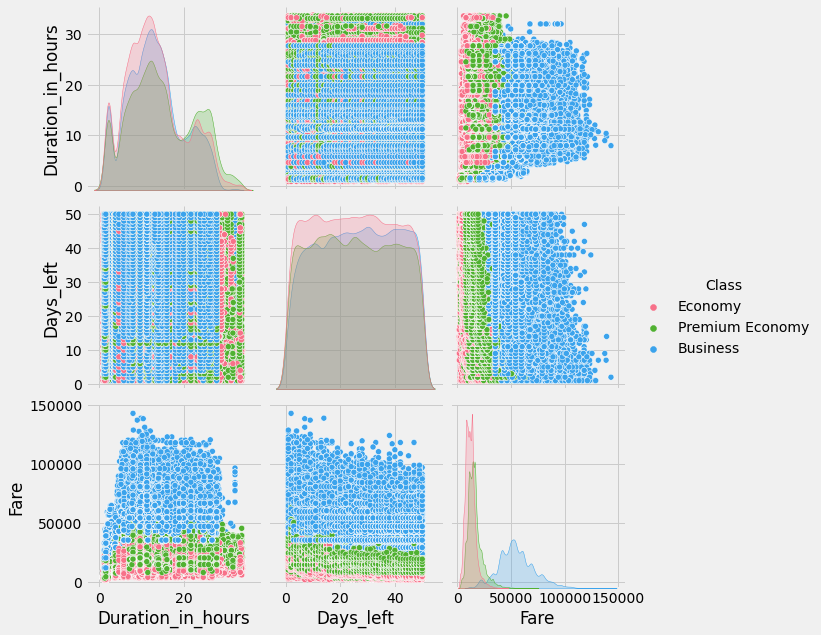

In [14]:
sns.pairplot(data,height=3,hue="Class", palette="husl")
plt.show()

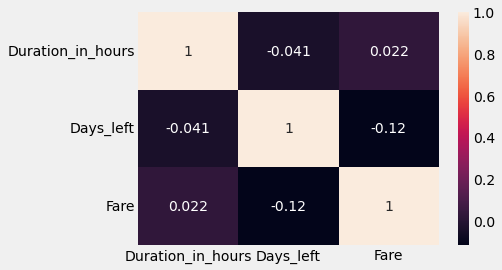

In [15]:
sns.heatmap(data.corr(), annot=True)
plt.show()

In [16]:
!pip install sweetviz

                                             |                                             | [  0%]   00:00 ->…


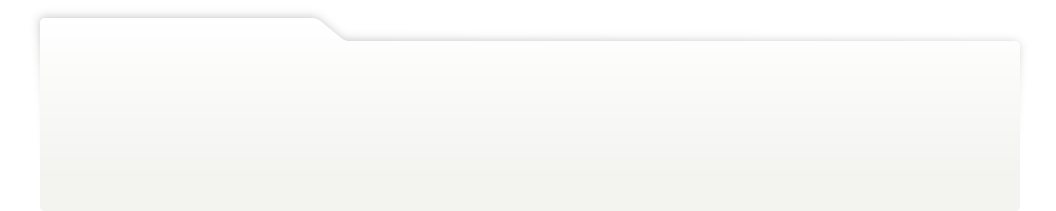
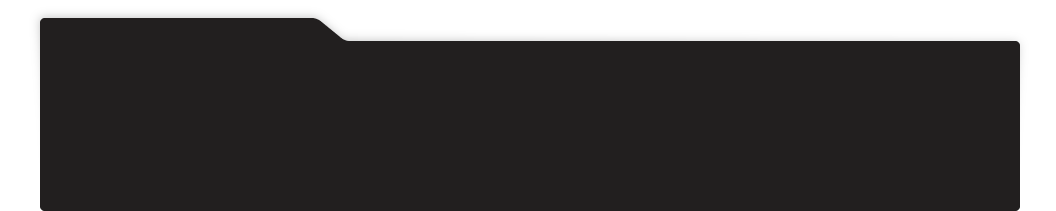
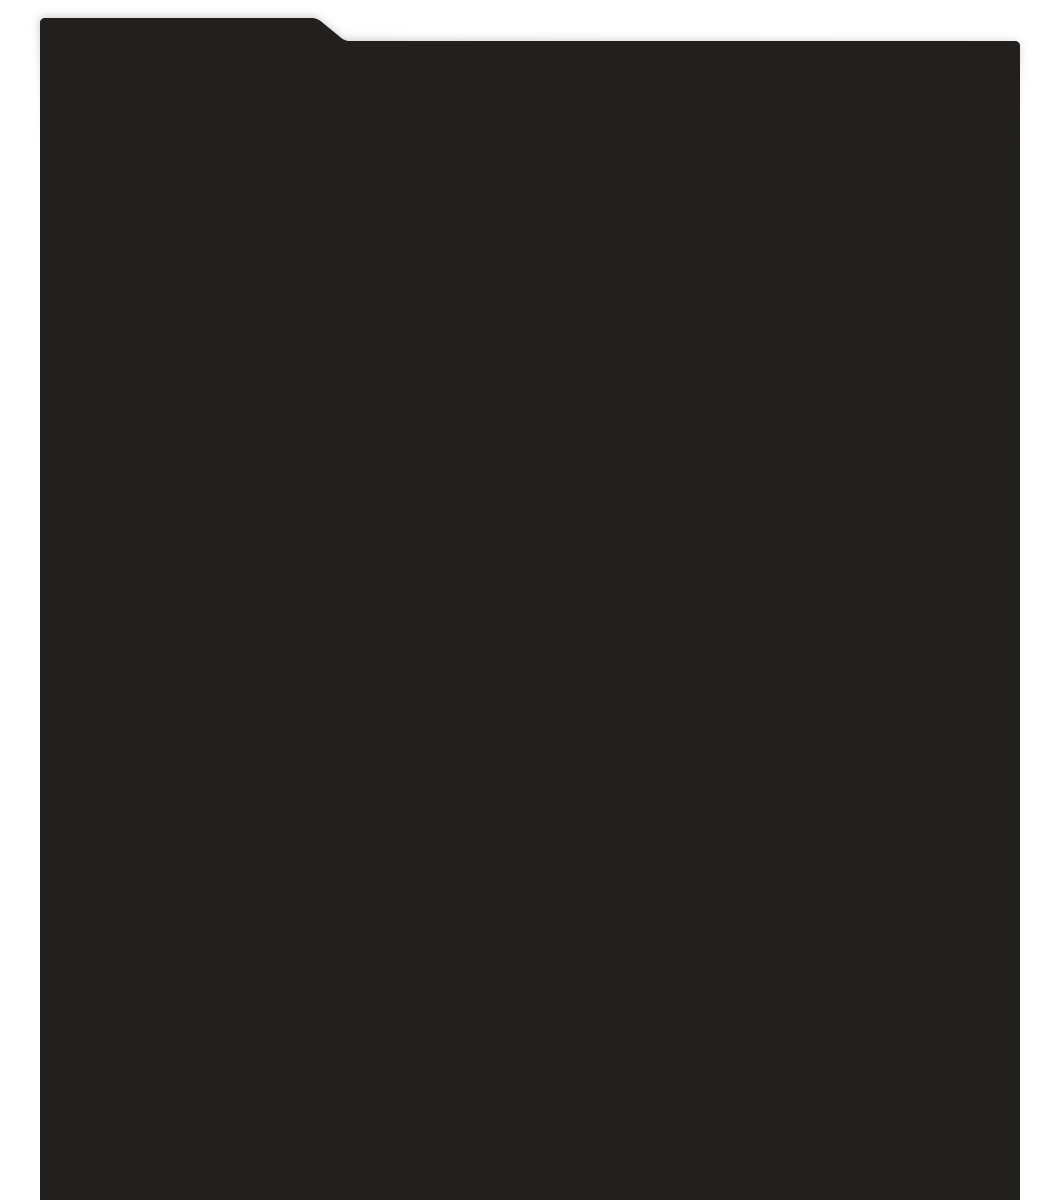
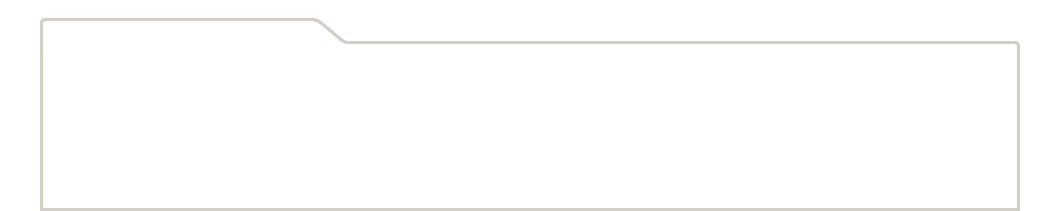
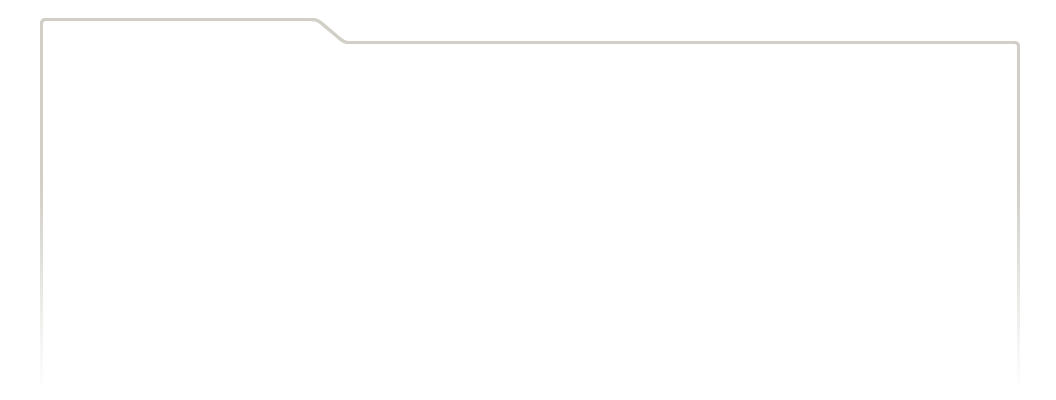
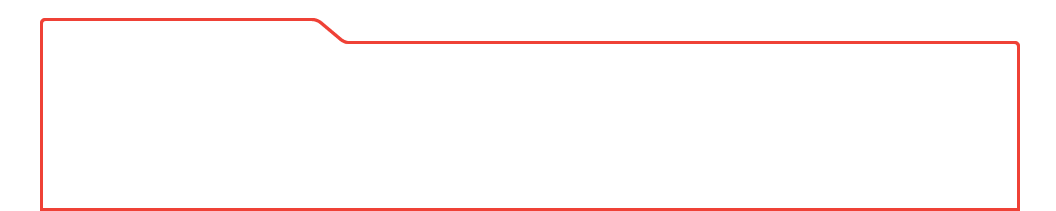
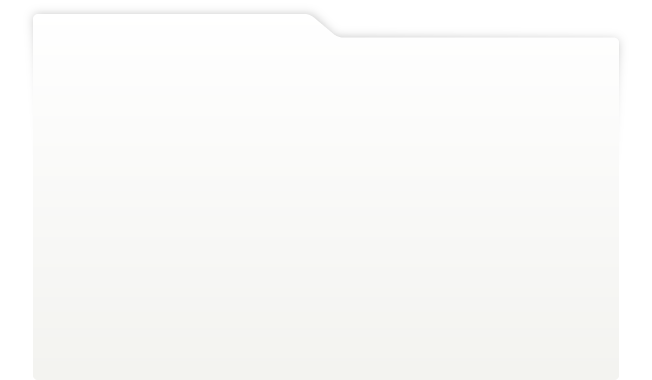
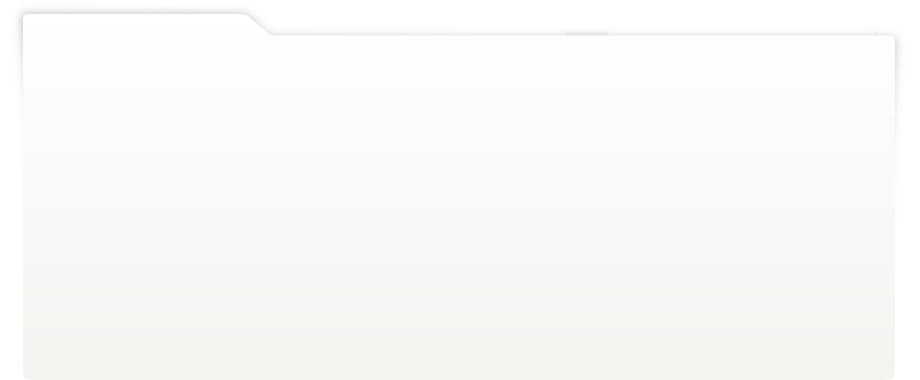
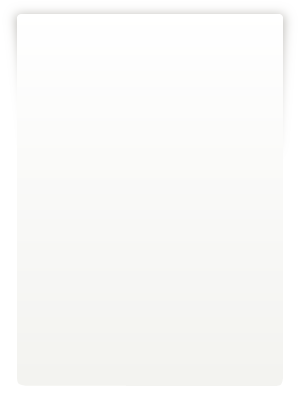
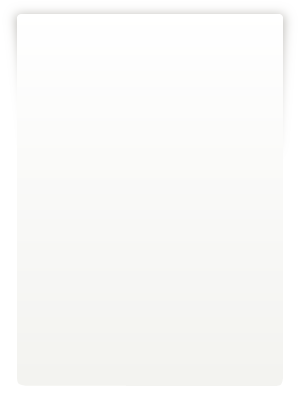
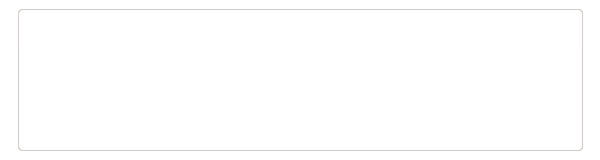
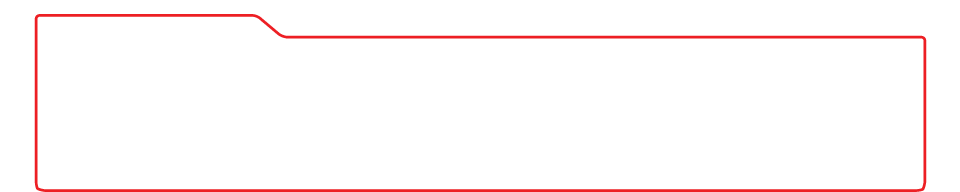
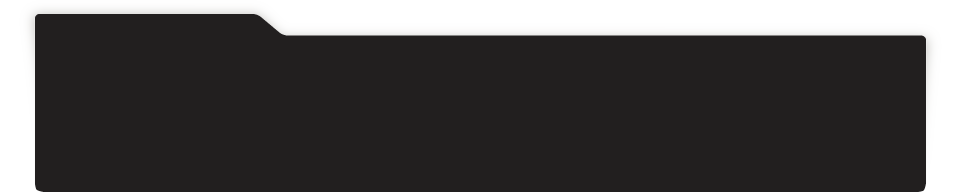
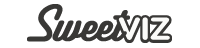
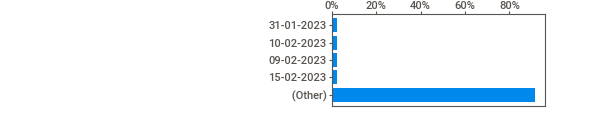
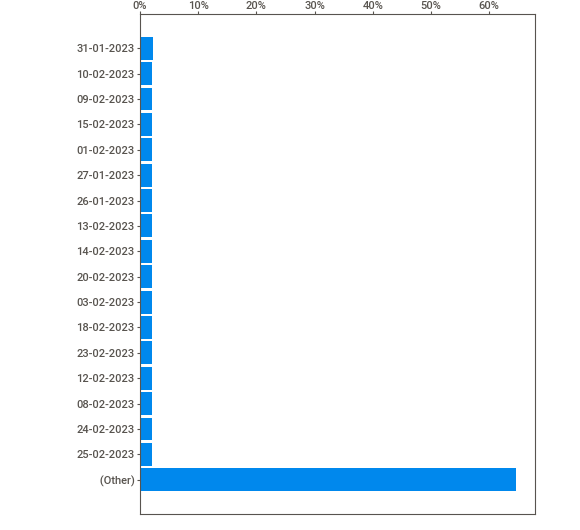
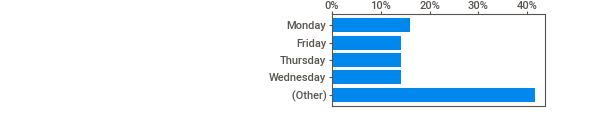
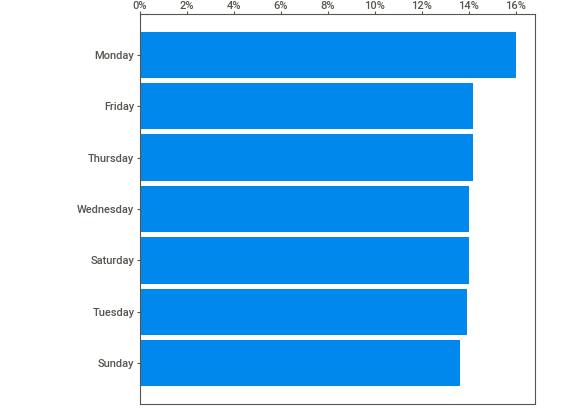
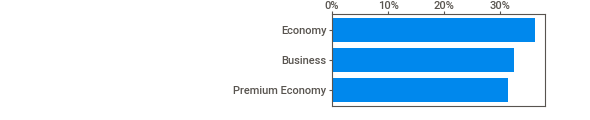
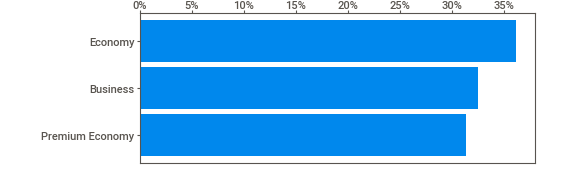
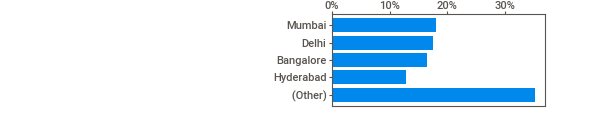
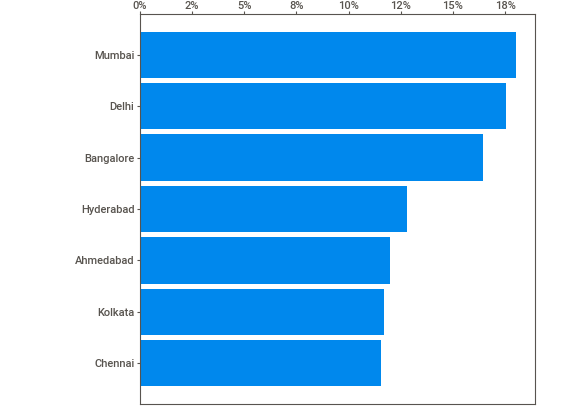
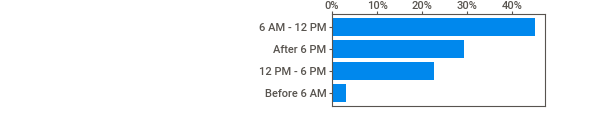
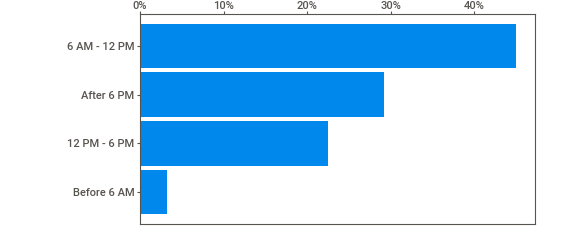
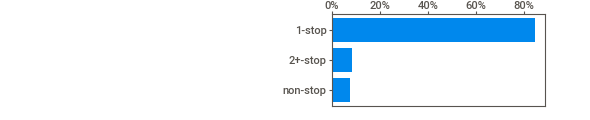
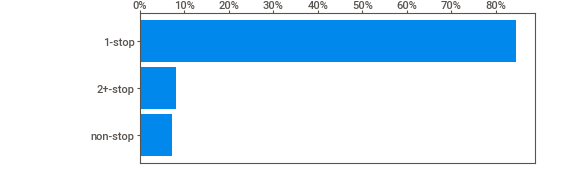
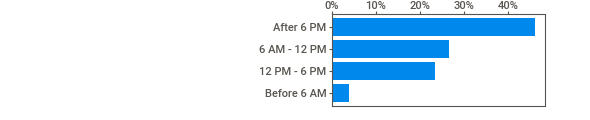
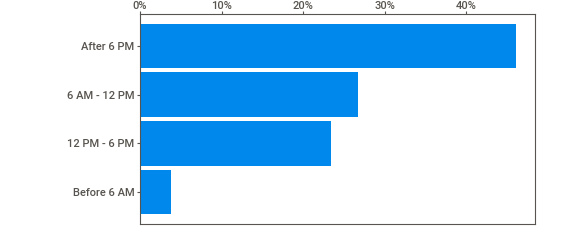
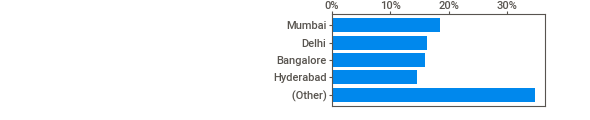
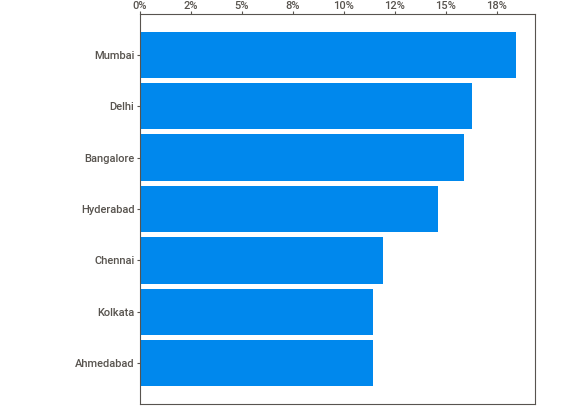
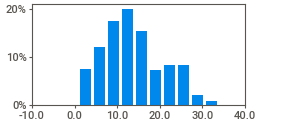
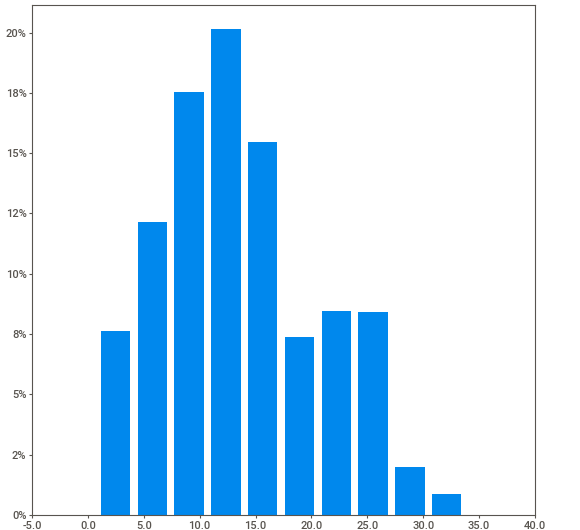
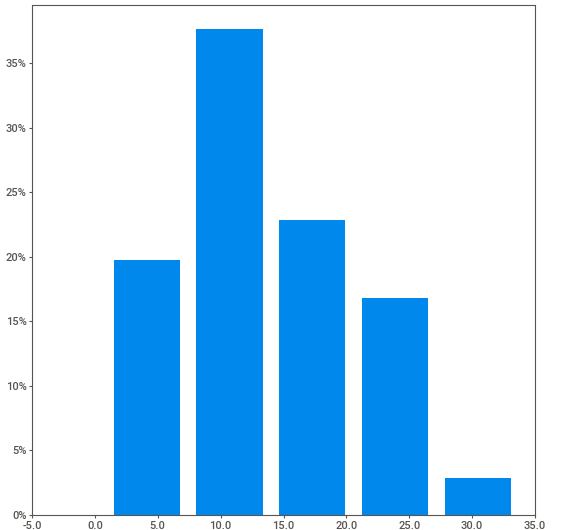
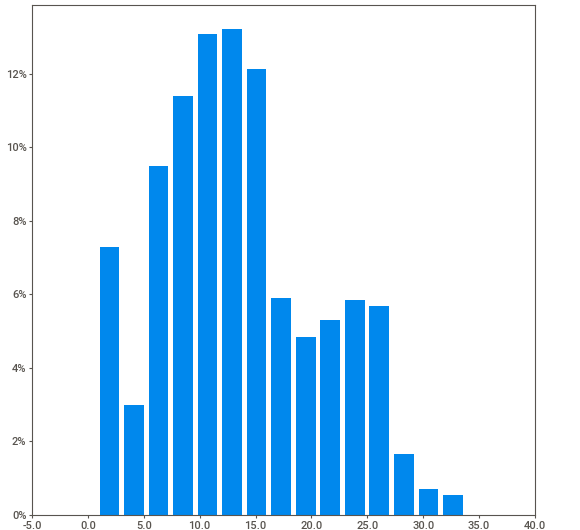
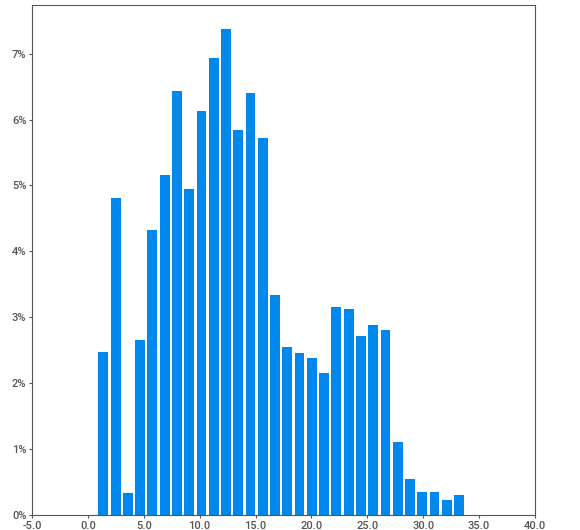
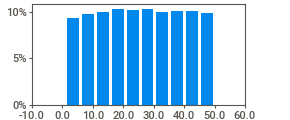
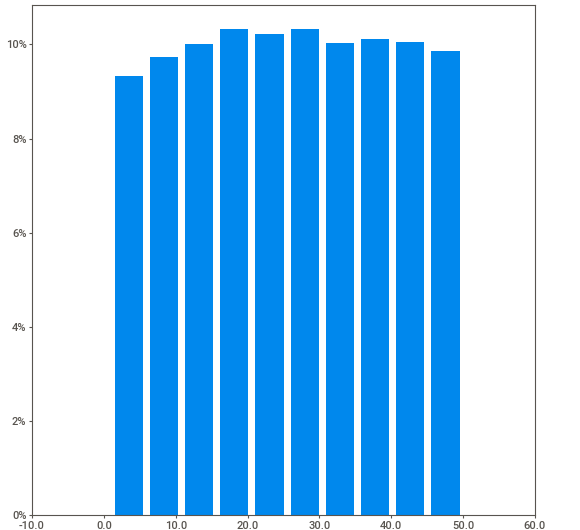
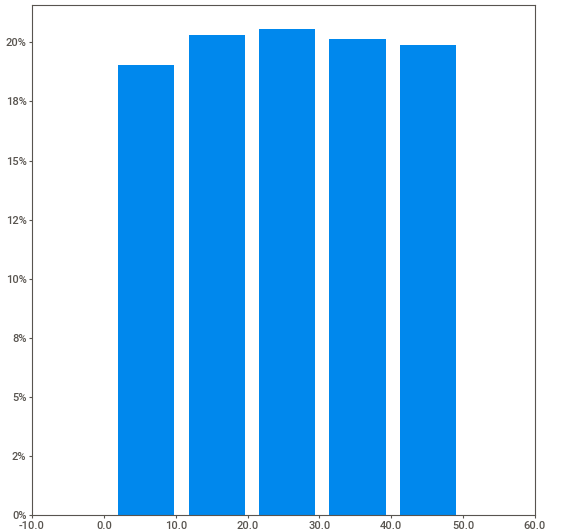
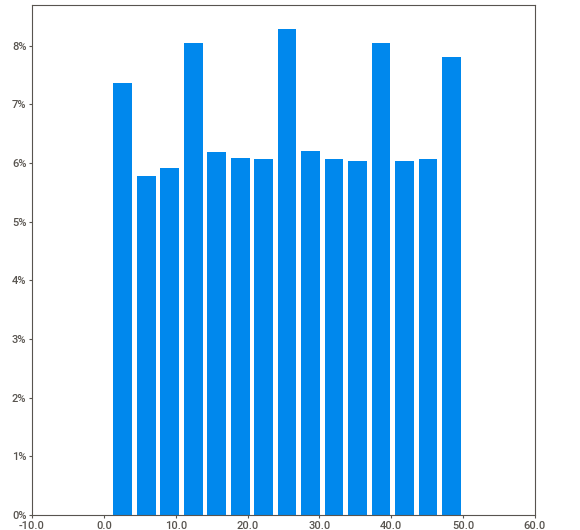
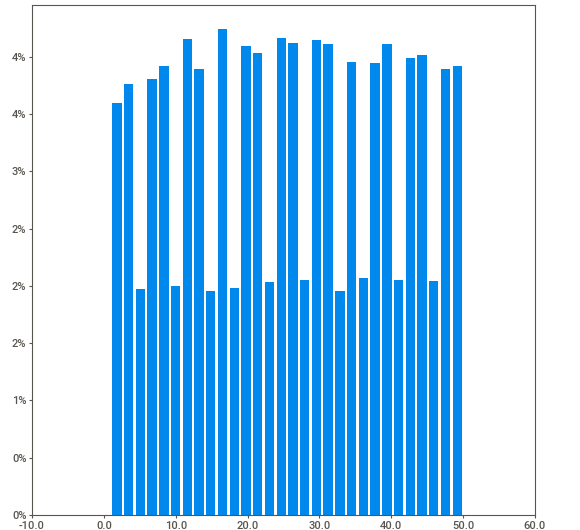
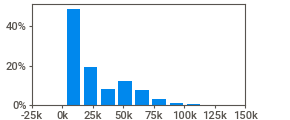
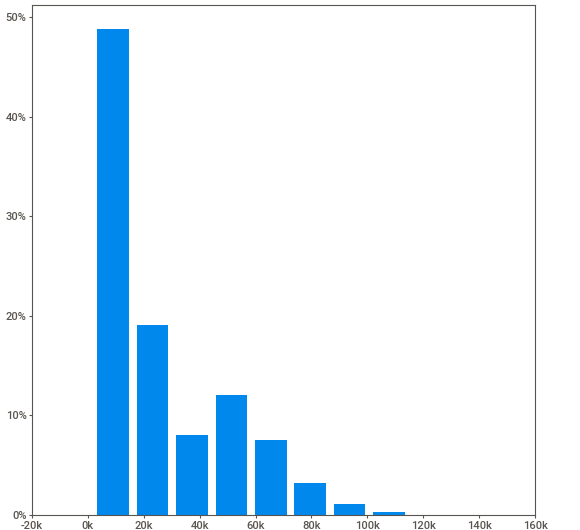
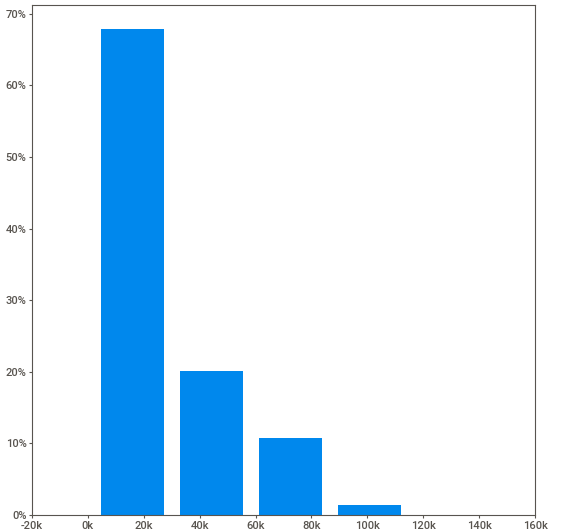
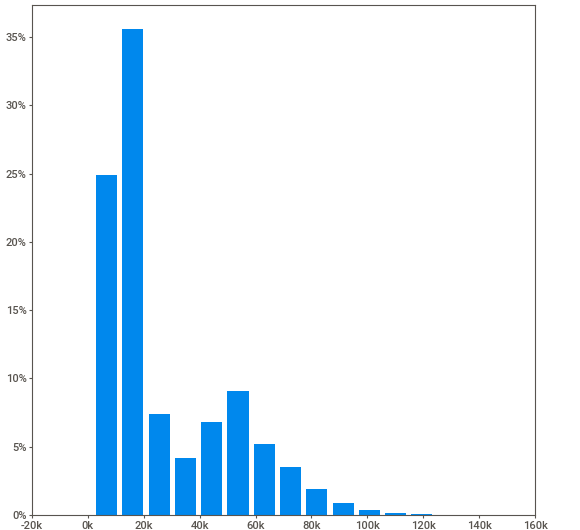
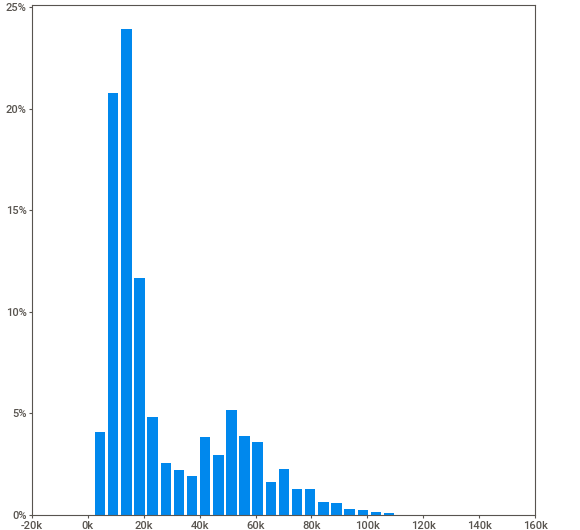
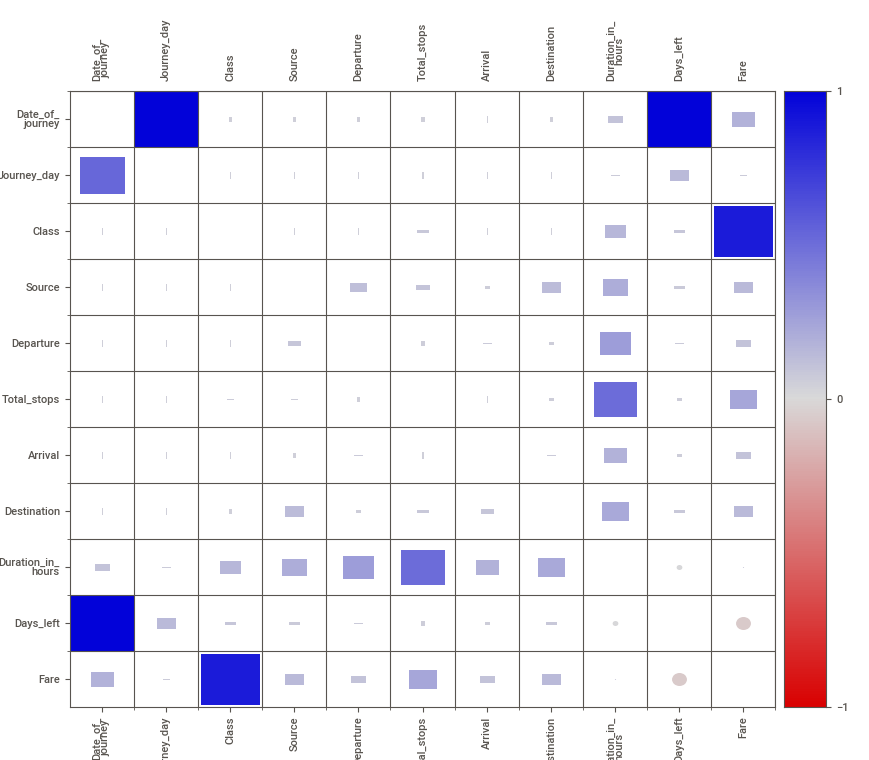
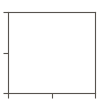

In [17]:
import sweetviz as sv
analyze_report = sv.analyze(data)
analyze_report.show_notebook(layout="widescreen")

In [18]:
data.dtypes

Date_of_journey       object
Journey_day           object
Flight_code           object
Class                 object
Source                object
Departure             object
Total_stops           object
Arrival               object
Destination           object
Duration_in_hours    float64
Days_left              int64
Fare                   int64
dtype: object

In [19]:
data.columns

Index(['Date_of_journey', 'Journey_day', 'Flight_code', 'Class', 'Source',
       'Departure', 'Total_stops', 'Arrival', 'Destination',
       'Duration_in_hours', 'Days_left', 'Fare'],
      dtype='object')

In [20]:
data.shape

(229377, 12)

In [21]:
data.head()

,Date_of_journey,Journey_day,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare
0,16-01-2023,Monday,UK-985,Economy,Delhi,After 6 PM,non-stop,After 6 PM,Mumbai,2.2500,1,7320
1,16-01-2023,Monday,UK-627,Economy,Delhi,12 PM - 6 PM,1-stop,12 PM - 6 PM,Mumbai,24.7500,1,8055
2,16-01-2023,Monday,UK-627,Economy,Delhi,12 PM - 6 PM,1-stop,12 PM - 6 PM,Mumbai,26.5000,1,8370
3,16-01-2023,Monday,UK-811,Economy,Delhi,Before 6 AM,1-stop,After 6 PM,Mumbai,16.0833,1,8491
4,16-01-2023,Monday,UK-811,Economy,Delhi,Before 6 AM,1-stop,After 6 PM,Mumbai,17.7500,1,8491


In [22]:
data["Journey_date"] = pd.to_datetime(data.Date_of_journey , format= "%d-%m-%Y").dt.day
data["Journey_month"] = pd.to_datetime(data.Date_of_journey , format= "%d-%m-%Y").dt.month
data["Journey_year"] = pd.to_datetime(data.Date_of_journey , format= "%d-%m-%Y").dt.year

In [23]:
data.dtypes

Date_of_journey       object
Journey_day           object
Flight_code           object
Class                 object
Source                object
Departure             object
Total_stops           object
Arrival               object
Destination           object
Duration_in_hours    float64
Days_left              int64
Fare                   int64
Journey_date           int64
Journey_month          int64
Journey_year           int64
dtype: object

In [24]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Journey_day"]=le.fit_transform(data["Journey_day"])

data["Flight_code"]=le.fit_transform(data["Flight_code"])
data["Class"]=le.fit_transform(data["Class"])
data["Source"]=le.fit_transform(data["Departure"])
data["Total_stops"]=le.fit_transform(data["Total_stops"])
data["Arrival"]=le.fit_transform(data["Arrival"])
data["Destination"]=le.fit_transform(data["Destination"])
data["Departure"]=le.fit_transform(data["Departure"])


In [25]:
data=data.drop("Date_of_journey",axis=1)

In [26]:
data.head()

,Journey_day,Flight_code,Class,Source,Departure,Total_stops,Arrival,Destination,Duration_in_hours,Days_left,Fare,Journey_date,Journey_month,Journey_year
0,1,156,1,2,2,2,2,6,2.2500,1,7320,16,1,2023
1,1,10,1,0,0,0,0,6,24.7500,1,8055,16,1,2023
2,1,10,1,0,0,0,0,6,26.5000,1,8370,16,1,2023
3,1,45,1,3,3,0,2,6,16.0833,1,8491,16,1,2023
4,1,45,1,3,3,0,2,6,17.7500,1,8491,16,1,2023


In [41]:
X=data.drop("Fare",axis=1)
y=data["Fare"]

In [42]:
#Converting Dataframes to Numpy Arrays for K-fold Cross Validation
X = X.values
y = y.values

In [51]:
from sklearn.model_selection import KFold , train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow import keras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_splits = 5

kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []

# Neural Networks

In [52]:
model = keras.Sequential([
    keras.layers.Input(shape=(X.shape[1],)),   # Input layer
    keras.layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation
])

In [53]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [54]:
for epoch in range(50):
    for train_index, val_index in kf.split(X):
    
        X_fold_train, X_val = X[train_index], X[val_index]
        y_fold_train, y_val = y[train_index], y[val_index]

    
        model.fit(X_fold_train, y_fold_train, epochs=1, batch_size=32, verbose=0)

   
        y_pred_val = model.predict(X_val)

    
        mse_val = mean_squared_error(y_val, y_pred_val)
        mse_scores.append(mse_val)

   
        r2_val = r2_score(y_val, y_pred_val)
        r2_scores.append(r2_val)
    print(f"Epoch {epoch + 1} completed.")

1434/1434 [==============================] - 1s 910us/step
Epoch 1 completed.
1434/1434 [==============================] - 1s 760us/step
Epoch 2 completed.
1434/1434 [==============================] - 2s 1ms/step
Epoch 3 completed.
1434/1434 [==============================] - 1s 860us/step
Epoch 4 completed.
1434/1434 [==============================] - 1s 756us/step
Epoch 5 completed.
1434/1434 [==============================] - 1s 835us/step
Epoch 6 completed.
1434/1434 [==============================] - 1s 798us/step
Epoch 7 completed.
1434/1434 [==============================] - 1s 735us/step
Epoch 8 completed.
1434/1434 [==============================] - 1s 782us/step
Epoch 9 completed.
1434/1434 [==============================] - 1s 773us/step
Epoch 10 completed.
1434/1434 [==============================] - 1s 773us/step
Epoch 11 completed.
1434/1434 [==============================] - 1s 775us/step
Epoch 12 completed.
1434/1434 [==============================] - 1s 774us/step
Epoc

1434/1434 [==============================] - 1s 750us/step
Epoch 27 completed.
1434/1434 [==============================] - 1s 788us/step
Epoch 28 completed.
1434/1434 [==============================] - 1s 832us/step
Epoch 29 completed.
1434/1434 [==============================] - 1s 776us/step
Epoch 30 completed.
1434/1434 [==============================] - 1s 831us/step
Epoch 31 completed.
1434/1434 [==============================] - 1s 804us/step
Epoch 32 completed.
1434/1434 [==============================] - 1s 733us/step
Epoch 33 completed.
1434/1434 [==============================] - 1s 796us/step
Epoch 34 completed.
1434/1434 [==============================] - 1s 810us/step
Epoch 35 completed.
1434/1434 [==============================] - 1s 804us/step
Epoch 36 completed.
1434/1434 [==============================] - 1s 760us/step
Epoch 37 completed.
1434/1434 [==============================] - 1s 826us/step
Epoch 38 completed.
1434/1434 [==============================] - 1s 830u

In [55]:
# Calculate the mean and standard deviation of Mean Squared Error values and R-squared values on the validation sets
mean_mse_val = np.mean(mse_scores)
std_mse_val = np.std(mse_scores)

mean_r2_val = np.mean(r2_scores)
std_r2_val = np.std(r2_scores)

In [56]:
print(f'Mean Squared Error across {num_splits}-fold cross-validation on validation sets: {mean_mse_val:.4f} +/- {std_mse_val:.4f}')
print(f'Mean R-squared across {num_splits}-fold cross-validation on validation sets: {mean_r2_val:.4f} +/- {std_r2_val:.4f}')


Mean Squared Error across 5-fold cross-validation on validation sets: 88947856.8085 +/- 62267533.0097
Mean R-squared across 5-fold cross-validation on validation sets: 0.8158 +/- 0.1290


In [57]:
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)


1434/1434 [==============================] - 1s 804us/step


In [58]:
print(f'Mean Squared Error on the test set: {mse_test:.4f}')
print(f'R-squared on the test set: {r2_test:.4f}')

Mean Squared Error on the test set: 73532935.9818
R-squared on the test set: 0.8471
